**Final Assignment Code and Interpretation**

*Introduction*


> In the following code we look at both question 3 and question 4. The interpretations of all the data is within this google colab file. We have interpreted below each graph as needed and provided mark up and explanations throughout of the steps taken.



#Installation of packages and Importing

## Install Relevant Packages

We install all relevant packages needed through pip. Packages that are not to the latest version are installed and packages that may not be in google colab are installed.

In [ ]:
pip install numpy

In [ ]:
pip install --upgrade numpy

In [ ]:
pip install pandas

In [ ]:
pip install bnlearn

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

## Import Packages Neeeded

In this section we import all of the packages needed to be used in the investigation. This includes for the ARIMA model, basic functions and libraries that have to do with DateTime variables as well as the libraries needed for the EDA

In [ ]:
## Import all the relevant packages needed in the investigation
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

# Question 3

## Uploading Data and creating the DataFrames

In [ ]:
#upload Valusha_Jarryd_Data - FinalEDA1Data.csv
uploaded = files.upload()

Saving Valusha_Jarryd_Data - FinalEDA1Data.csv to Valusha_Jarryd_Data - FinalEDA1Data.csv


In [ ]:
#Upload EDAYCom.csv
uploaded1 = files.upload()

Saving EDAYCom.csv to EDAYCom.csv


In [ ]:
#Upload EDAGCom.csv
uploaded2 = files.upload()

Saving EDAGcom.csv to EDAGcom.csv


In [ ]:
#Read each respective csv using pandas
EDAdata2 = pd.read_csv("EDAYCom.csv")
EDAdata3 = pd.read_csv("EDAGcom.csv")
EDAdata = pd.read_csv("Valusha_Jarryd_Data - FinalEDA1Data.csv")

## Check Data Entries


Here we will ensure that the data for each data set has been uploaded correctly, by looking at the top 5 rows namely the head function as well as looking at the bottom 5 rows using the tail function. Then we also use the info function to obtain the data type of each variable as well as the non-null count.
Each data set is under there respective columns.

### EDA Data 1

In [ ]:
#this function looks at the top 5 rows
EDAdata.head()

,Area_Code,M49_Area_Code,Area,Element,Unit,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,Average_1961FE,Average_2010FE2,Inc_Dec_Past,Average_Over_All_Years
0,2,4,Afghanistan,Import Quantity,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,9.0,237.00,278.00,197.00,209.00,153.00,0.0000,116.090909,Increased from last period,19.953125
1,2,4,Afghanistan,Export Quantity,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,16.0,81.00,67.00,199.00,175.00,136.00,0.0000,62.636364,Increased from last period,10.765625
2,2,4,Afghanistan,Domestic supply quantity,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,-6.0,155.00,212.00,-2.00,34.00,17.00,0.0000,53.545455,Increased from last period,9.203125
3,2,4,Afghanistan,Food supply quantity (kg/capita/yr),kg,0.0,0.0,0.0,0.0,0.0,...,0.0,4.71,5.83,0.03,0.89,0.44,0.0000,1.568182,Increased from last period,0.269531
4,3,8,Albania,Production,1000 tonnes,30.0,30.0,31.0,32.0,32.0,...,257.0,285.00,287.00,289.00,300.00,313.00,92.1698,254.090909,Increased from last period,120.000000


In [ ]:
#this function looks at the bottom 5 rows
EDAdata.tail()

,Area_Code,M49_Area_Code,Area,Element,Unit,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,Average_1961FE,Average_2010FE2,Inc_Dec_Past,Average_Over_All_Years
811,5817,902,Net Food Importing Developing Countries,Production,1000 tonnes,1870.00,2008.00,2063.0,2369.0,2539.00,...,17658.00,16890.00,16459.00,16974.0,17398.00,17531.0,8169.77000,17027.000000,Increased from last period,9692.109375
812,5817,902,Net Food Importing Developing Countries,Import Quantity,1000 tonnes,33.00,33.00,35.0,35.0,41.00,...,1415.00,1510.00,1299.00,1257.0,1564.00,1734.0,275.85400,1355.909091,Increased from last period,461.488607
813,5817,902,Net Food Importing Developing Countries,Export Quantity,1000 tonnes,155.00,202.00,225.0,209.0,222.00,...,1235.00,1349.00,1219.00,1420.0,1485.00,1369.0,395.33300,1294.636364,Increased from last period,549.901042
814,5817,902,Net Food Importing Developing Countries,Domestic supply quantity,1000 tonnes,1748.00,1839.00,1873.0,2195.0,2358.00,...,17660.00,16774.00,16342.00,16799.0,17293.00,17868.0,8064.17000,16986.636360,Increased from last period,9597.718750
815,5817,902,Net Food Importing Developing Countries,Food supply quantity (kg/capita/yr),kg,4.03,4.14,4.1,4.7,4.94,...,10.86,10.08,9.65,9.7,9.74,9.9,8.31774,10.554545,Increased from last period,8.702188


In [ ]:
#this function gives information about the dataset
EDAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Code               816 non-null    int64  
 1   M49_Area_Code           816 non-null    int64  
 2   Area                    816 non-null    object 
 3   Element                 816 non-null    object 
 4   Unit                    816 non-null    object 
 5   1961                    816 non-null    float64
 6   1962                    816 non-null    float64
 7   1963                    816 non-null    float64
 8   1964                    816 non-null    float64
 9   1965                    816 non-null    float64
 10  1966                    816 non-null    float64
 11  1967                    816 non-null    float64
 12  1968                    816 non-null    float64
 13  1969                    816 non-null    float64
 14  1970                    816 non-null    fl

### EDA Data 2

In [ ]:
EDAdata2.head()

,Year,Total domestic supply quantity,Total Export Quantity,Total import quantity,Customer Interest,Total Tomato Yield
0,2010,605091.0,87084.0,51156.0,2238.14,634604.0
1,2011,690170.0,97716.0,61228.0,2589.60,727659.0
2,2012,713521.0,95505.0,61697.0,2588.27,740660.0
3,2013,725785.0,99202.0,64447.0,2501.63,757938.0
4,2014,712018.0,100906.0,64373.0,2668.93,737297.0


In [ ]:
EDAdata2.tail()

,Year,Total domestic supply quantity,Total Export Quantity,Total import quantity,Customer Interest,Total Tomato Yield
59,2009,690057.8139,67133.54047,62829.06085,2905.736656,705033.8830
60,2010,677408.3743,70487.17525,64692.74235,2897.724738,695248.8966
61,2011,702255.5808,71566.36829,67166.03176,2738.026555,652755.9483
62,2012,704669.5213,70692.77982,64737.65172,2798.001160,724527.4354
63,2013,717416.4860,59485.48863,66302.22074,2749.532383,623949.1371


In [ ]:
EDAdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            64 non-null     int64  
 1   Total domestic supply quantity  64 non-null     float64
 2   Total Export Quantity           64 non-null     float64
 3   Total import quantity           64 non-null     float64
 4   Customer Interest               64 non-null     float64
 5   Total Tomato Yield              64 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.1 KB


### EDA Data 3

In [ ]:
EDAdata3.head()

,Year,Total domestic supply quantity,Total Export Quantity,Total import quantity,Customer Interest,Total Tomato Yield
0,1961_2013,339467.8255,35737.11626,30217.46221,2190.855424,343808.3004
1,2010_2020,743843.5455,100511.09090,65524.27272,2580.567273,776855.5455
2,1961_2020,408969.9023,46870.14315,36285.82027,2257.837148,418238.2956


In [ ]:
EDAdata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            3 non-null      object 
 1   Total domestic supply quantity  3 non-null      float64
 2   Total Export Quantity           3 non-null      float64
 3   Total import quantity           3 non-null      float64
 4   Customer Interest               3 non-null      float64
 5   Total Tomato Yield              3 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


## Understanding our data by looking at which variables are Catagorical and which are numeric.

We look specifically at each column to see its data type and then we add them to the respective list, which we then display.

In [ ]:
#Dataset1 ()
CatagoricalEDA_Columns = EDAdata.select_dtypes(include = ['object']).columns
NumericalEDA_Columns = EDAdata.select_dtypes(include = np.number).columns.tolist()
print("Catagorical Variables:")
print(CatagoricalEDA_Columns)
print("Numerical Variables:")
print(NumericalEDA_Columns)

Catagorical Variables:
Index(['Area', 'Element', 'Unit', 'Inc_Dec_Past'], dtype='object')
Numerical Variables:
['Area_Code', 'M49_Area_Code', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Average_1961FE', 'Average_2010FE2', 'Average_Over_All_Years']


In [ ]:
#Dataset2
CatagoricalEDA_Columns = EDAdata2.select_dtypes(include = ['object']).columns
NumericalEDA_Columns = EDAdata2.select_dtypes(include = np.number).columns.tolist()
print("Catagorical Variables:")
print(CatagoricalEDA_Columns)
print("Numerical Variables:")
print(NumericalEDA_Columns)

Catagorical Variables:
Index([], dtype='object')
Numerical Variables:
['Year', 'Total domestic supply quantity', 'Total Export Quantity', 'Total import quantity', 'Customer Interest', 'Total Tomato Yield']


In [ ]:
#Dataset3
CatagoricalEDA_Columns = EDAdata3.select_dtypes(include = ['object']).columns
NumericalEDA_Columns = EDAdata3.select_dtypes(include = np.number).columns.tolist()
print("Catagorical Variables:")
print(CatagoricalEDA_Columns)
print("Numerical Variables:")
print(NumericalEDA_Columns)

Catagorical Variables:
Index(['Year'], dtype='object')
Numerical Variables:
['Total domestic supply quantity', 'Total Export Quantity', 'Total import quantity', 'Customer Interest', 'Total Tomato Yield']


## Datasets

In [ ]:
#Correlation matrix Data set 1
EDAdata.corr()

<ipython-input-101-8ae21a66359d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDAdata.corr()


,Area_Code,M49_Area_Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,Average_1961FE,Average_2010FE2,Average_Over_All_Years
Area_Code,1.000000,-0.373633,0.256215,0.257107,0.261005,0.264010,0.265886,0.267371,0.266677,0.264495,...,0.236629,0.245683,0.248532,0.243461,0.245958,0.244966,0.235320,0.272896,0.244371,0.265853
M49_Area_Code,-0.373633,1.000000,-0.134613,-0.134275,-0.134687,-0.136226,-0.137423,-0.137099,-0.137486,-0.134656,...,-0.124284,-0.132733,-0.130345,-0.131036,-0.130635,-0.130890,-0.126664,-0.134816,-0.130258,-0.134529
1961,0.256215,-0.134613,1.000000,0.998888,0.999197,0.974915,0.973772,0.973622,0.974234,0.967928,...,0.798167,0.817305,0.823383,0.805621,0.816594,0.812770,0.804920,0.924433,0.820211,0.898032
1962,0.257107,-0.134275,0.998888,1.000000,0.998068,0.979948,0.978766,0.978587,0.979466,0.975583,...,0.795419,0.816871,0.824987,0.804564,0.818033,0.813979,0.806173,0.929018,0.821156,0.901441
1963,0.261005,-0.134687,0.999197,0.998068,1.000000,0.977639,0.976483,0.976916,0.977242,0.970339,...,0.794808,0.812989,0.817980,0.800619,0.810494,0.806604,0.798326,0.924665,0.814977,0.896436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.244966,-0.130890,0.812770,0.813979,0.806604,0.853607,0.858456,0.850674,0.847490,0.844880,...,0.990503,0.996183,0.999428,0.996698,0.999645,1.000000,0.997287,0.953639,0.999372,0.977710
2020,0.235320,-0.126664,0.804920,0.806173,0.798326,0.845252,0.850225,0.842253,0.839228,0.836831,...,0.988045,0.992907,0.996533,0.994182,0.997191,0.997287,1.000000,0.946394,0.996827,0.971972
Average_1961FE,0.272896,-0.134816,0.924433,0.929018,0.924665,0.964775,0.967249,0.964114,0.962160,0.960933,...,0.942837,0.956708,0.961008,0.948133,0.955522,0.953639,0.946394,1.000000,0.959127,0.995502
Average_2010FE2,0.244371,-0.130258,0.820211,0.821156,0.814977,0.861842,0.866686,0.859357,0.855948,0.852645,...,0.992588,0.997818,0.999571,0.997543,0.999219,0.999372,0.996827,0.959127,1.000000,0.981622


<ipython-input-102-367dbaaae378>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(EDAdata.corr());


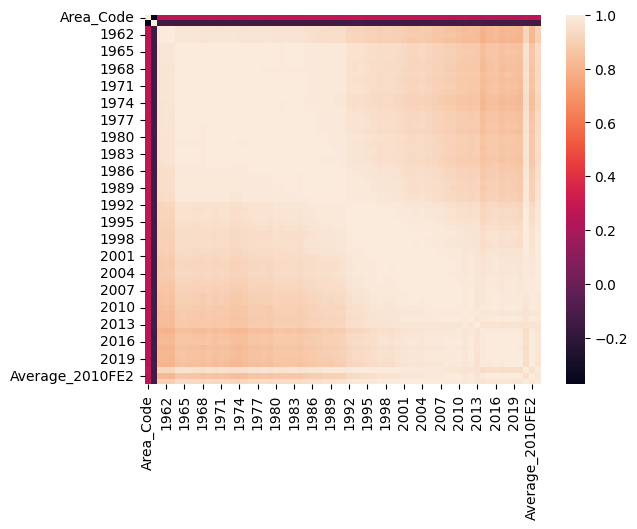

In [ ]:
#Heatmap for data set 1
sns.heatmap(EDAdata.corr());

Findings for the heatmap (Data set 1) :


1.   We can see that area code has little to no correlation amongst the other variables namely the years. Thus we can see that area code does not provide any measure of correlation and hence could have been left out of the data set.
2.   We can see when looking at the correlation of the years that the correlation amongst them is very high ranging from values between 0.8 and 1.0.
Thus we can infere that the years have a strong relationship between themeselves. This also means that since we have a high correlation we are better able to predict future values for each respective year.

In [ ]:
#Correlation matrix Data set 2
EDAdata2.corr()

,Year,Total domestic supply quantity,Total Export Quantity,Total import quantity,Customer Interest,Total Tomato Yield
Year,1.000000,0.975633,0.944896,0.979526,0.912217,0.972309
Total domestic supply quantity,0.975633,1.000000,0.972407,0.993769,0.839181,0.997203
Total Export Quantity,0.944896,0.972407,1.000000,0.955021,0.759968,0.982280
Total import quantity,0.979526,0.993769,0.955021,1.000000,0.869840,0.988558
Customer Interest,0.912217,0.839181,0.759968,0.869840,1.000000,0.829888
Total Tomato Yield,0.972309,0.997203,0.982280,0.988558,0.829888,1.000000


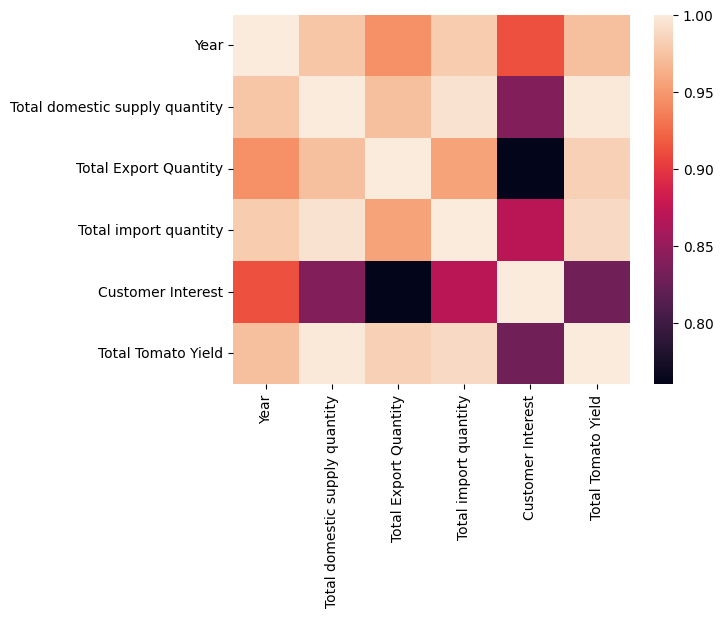

In [ ]:
#Heatmap for data set 2
sns.heatmap(EDAdata2.corr());

Findings for the heatmap (Data Set 2) :


1.   We can see when looking at the correlation of the Exports/Imports and Yield that the correlation amongst them is very high ranging from values between 0.95 and 1.0.
Thus we can infer that the variables have a strong relationship between themselves. This also means that since we have a high correlation we are better able to predict future values for each respective year.

2.   We can also see a high correlation between consumer interest and the other variables, although the values are not as high as stated in number 1, the correlation is still high, with values of 0.8 to 0.9 indicating that there is still a high future predictability with Consumer Interest.

In [ ]:
#Correlation matrix Data set 3
EDAdata3.corr()

<ipython-input-105-364edf36fda5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDAdata3.corr()


,Total domestic supply quantity,Total Export Quantity,Total import quantity,Customer Interest,Total Tomato Yield
Total domestic supply quantity,1.0,1.0,1.0,1.0,1.0
Total Export Quantity,1.0,1.0,1.0,1.0,1.0
Total import quantity,1.0,1.0,1.0,1.0,1.0
Customer Interest,1.0,1.0,1.0,1.0,1.0
Total Tomato Yield,1.0,1.0,1.0,1.0,1.0


<ipython-input-106-555ddf1c33ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(EDAdata3.corr());


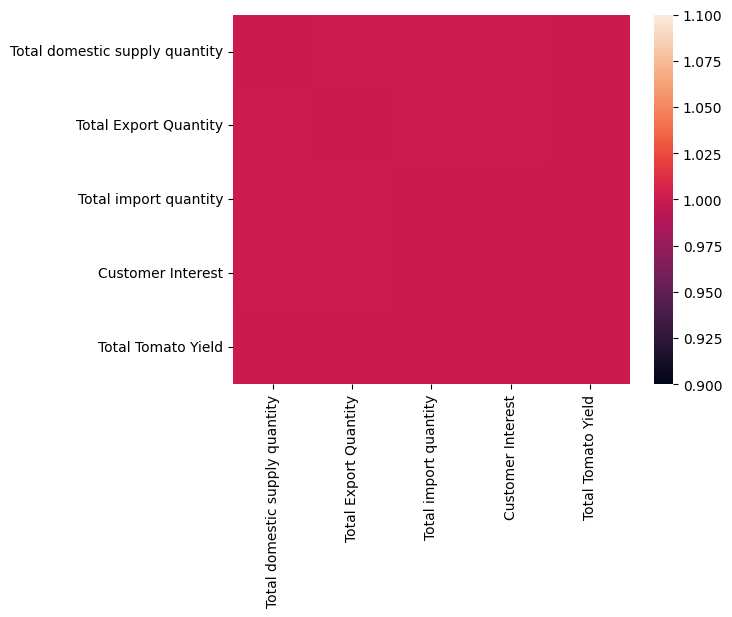

In [ ]:
#Heatmap for data set 3
sns.heatmap(EDAdata3.corr());

Findings for the heatmap (Data Set 3):


1.   We can see when looking at the correlation of the variables that they are very high, but also all the same, this is due to the fact that the data set  is very small and contains averages amongst all years, thus the averaging the heatmap indicates a correlation of 1 amongst all variables in this data set.
Hence we can infer that the variables have a strong relationship between themeselves. This also means that since we have a high correlation we are better able to predict future average values.

Text(0, 0.5, 'Yield (1000 tonnes)')

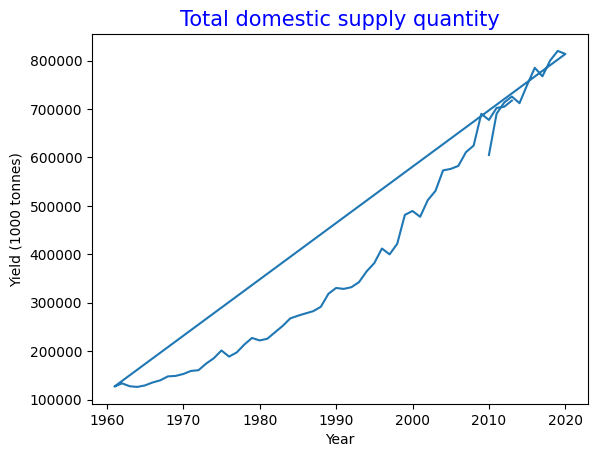

In [ ]:
plt.plot(EDAdata2['Year'],EDAdata2['Total domestic supply quantity'])
plt.title(label = "Total domestic supply quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

Findings for the line chart:

We can see that the total domestic supply of tomatoes have increased over the years from 1961 up until 2020. We can see that there is 3 lines on this graph, the first one being merely a straight line to show the trend and the other 2 lines showing the yield of tomatoes. The one line indicates the first datasets group, which is from 1961 up until 2013, and the second datasets group indicates 2010 to 2013.

We can see that there is a small mismatch in the binding of the overlapping years, this can suggest that there may be small inconsistencies in the data. Hence with further analysis we can decide on how to manage the mismatch in the overlapping years.

Text(0, 0.5, 'Yield (1000 tonnes)')

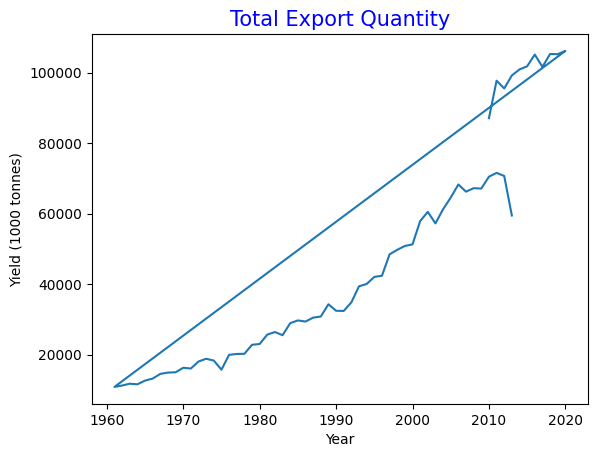

In [ ]:
plt.plot(EDAdata2['Year'],EDAdata2['Total Export Quantity'])
plt.title(label = "Total Export Quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

Findings for the line chart:

We can see that the total export quantity of tomatoes have increased over the years from 1961 up until 2020, we can see a decline from 2010 - 2013 according to the 1961 data set line. We can see that there is 3 lines on this graph, the first one being merely a straight line to show the trend and the other 2 lines showing the yield of tomatoes. The one line indicates the first datasets group, which is from 1961 up until 2013, and the second datasets group indicates 2010 to 2013.

We can see that there is a large mismatch in the binding of the overlapping years, this can suggest that there may be inconsistencies in the data. Hence with further analysis we can decide on how to manage the mismatch in the overlapping years.

Text(0, 0.5, 'Yield (1000 tonnes)')

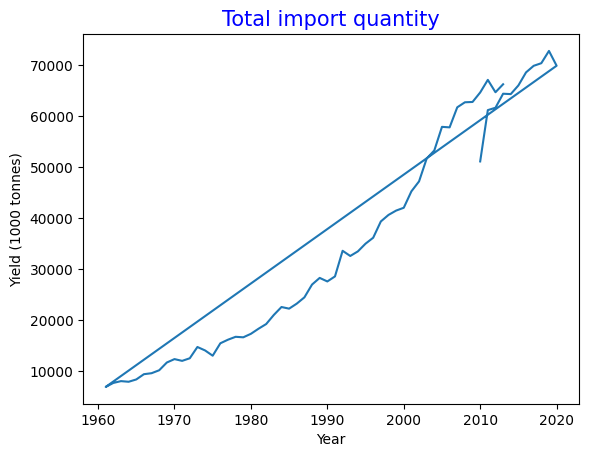

In [ ]:
plt.plot(EDAdata2['Year'],EDAdata2['Total import quantity'])
plt.title(label = "Total import quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

Findings for the line chart:

We can see that the import quantity of tomatoes have increased over the years from 1961 up until 2020. We can see that there is 3 lines on this graph, the first one being merely a straight line to show the trend and the other 2 lines showing the yield of tomatoes. The one line indicates the first datasets group, which is from 1961 up until 2013, and the second datasets group indicates 2010 to 2013.

We can see that there is a small mismatch in the binding of the overlapping years, this can suggest that there may be small inconsistencies in the data for the years 2010- 2011. Hence with further analysis we can decide on how to manage the mismatch in the overlapping years.

Text(0, 0.5, 'Yield ((kg/capita/yr))')

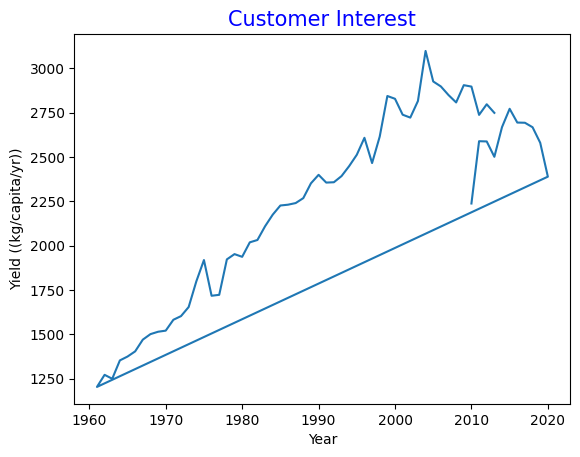

In [ ]:
plt.plot(EDAdata2['Year'],EDAdata2['Customer Interest'])
plt.title(label = "Customer Interest", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield ((kg/capita/yr))')

Findings for the line chart:

We can see that the consumer interest of tomatoes has increased over the years from 1961 up until 2005, thereafter we can the see a decline up until 2020, through the years of 2009-2011 we can see that there has been ups and downs in the consumer interest. We can see that there is 3 lines on this graph, the first one being merely a straight line to show the trend and the other 2 lines showing the yield of tomatoes. The one line indicates the first datasets group, which is from 1961 up until 2013, and the second datasets group indicates 2010 to 2013. We can see that the total consumer interest for tomatoes in 2020 has went down very low, and can be seen as the same amount as what it has been in 1990. Thus we can see that the overall consumer interest has gone down, hence this gives a clue as to why the demand for tomatoes has decreased.

We can see that there is a mismatch in the binding of the overlapping years, this can suggest that there may be inconsistencies in the data. Hence with further analysis we can decide on how to manage the mismatch in the overlapping years.

Text(0, 0.5, 'Yield (1000 tonnes)')

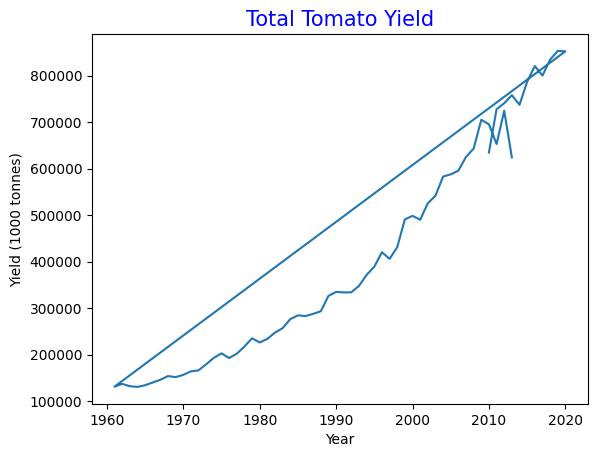

In [ ]:
plt.plot(EDAdata2['Year'],EDAdata2['Total Tomato Yield'])
plt.title(label = "Total Tomato Yield", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

Findings for the line chart:

We can see that the total tomato yield has increased over the years from 1961 up until 2020. We can see that there is 3 lines on this graph, the first one being merely a straight line to show the trend and the other 2 lines showing the yield of tomatoes. The one line indicates the first datasets group, which is from 1961 up until 2013, and the second datasets group indicates 2010 to 2013.

We can see that there is a small mismatch in the binding of the overlapping years, this can suggest that there may be small inconsistencies in the data. Hence with further analysis we can decide on how to manage the mismatch in the overlapping years.

Text(0, 0.5, 'Yield (1000 tonnes)')

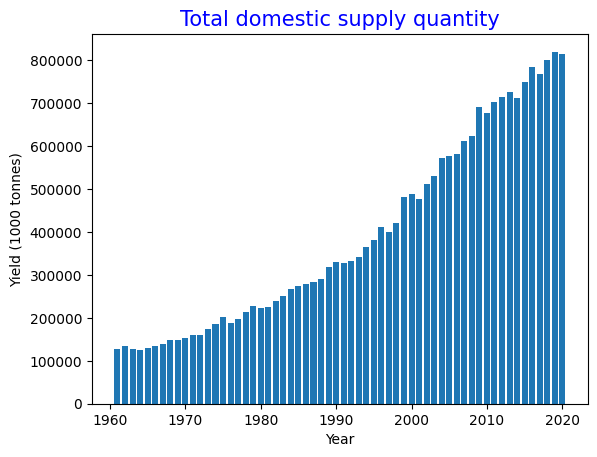

In [ ]:
plt.bar(EDAdata2['Year'],EDAdata2['Total domestic supply quantity'])
plt.title(label = "Total domestic supply quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

With this bar chart we can see an overall incline in the Total domestic supply quantity over the years

Text(0, 0.5, 'Yield (1000 tonnes)')

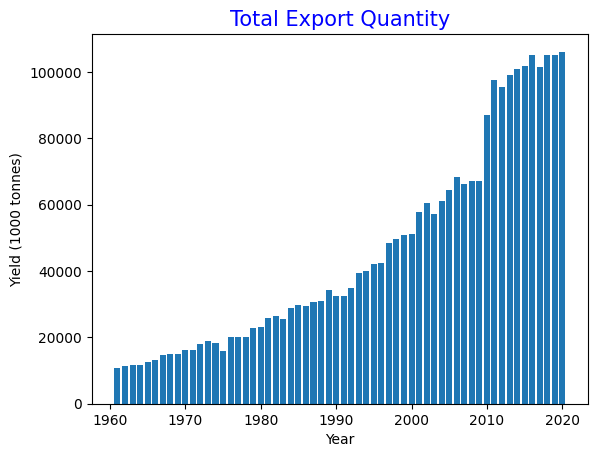

In [ ]:
plt.bar(EDAdata2['Year'],EDAdata2['Total Export Quantity'])
plt.title(label = "Total Export Quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

With this bar chart we can see an overall incline in the Total export quantity over the years. We can see since 2007- 2010 the yield has been relatively consistent but in 2011 it spiked and increased further.

Text(0, 0.5, 'Yield (1000 tonnes)')

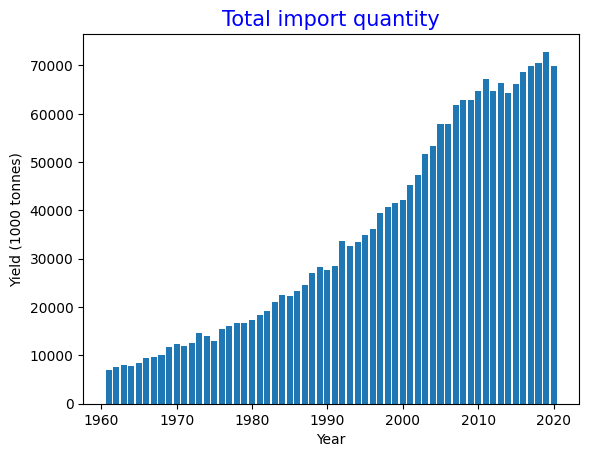

In [ ]:
plt.bar(EDAdata2['Year'],EDAdata2['Total import quantity'])
plt.title(label = "Total import quantity", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

With this bar chart we can see an overall incline in the Total import quantity over the years. We can see a small dip in the yield in 2015 , whereafter the yield increased again.

Text(0, 0.5, 'Yield ((kg/capita/yr))')

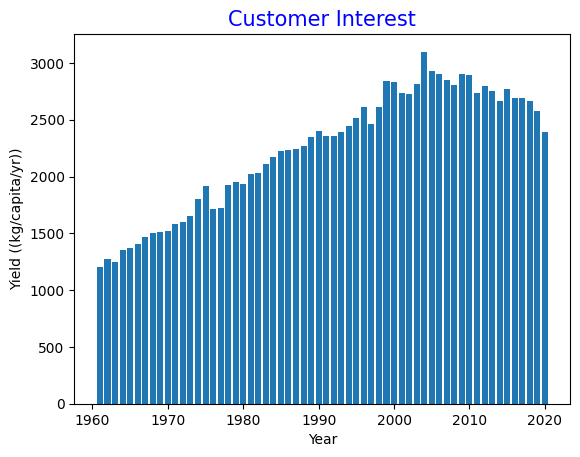

In [ ]:
plt.bar(EDAdata2['Year'],EDAdata2['Customer Interest'])
plt.title(label = "Customer Interest", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield ((kg/capita/yr))')

With this bar chart we can see an overall incline in the Customer interest over the years. We can see a decline in the yield in 2005 , whereafter the yield kept decreasing up until 2020.

Text(0, 0.5, 'Yield (1000 tonnes)')

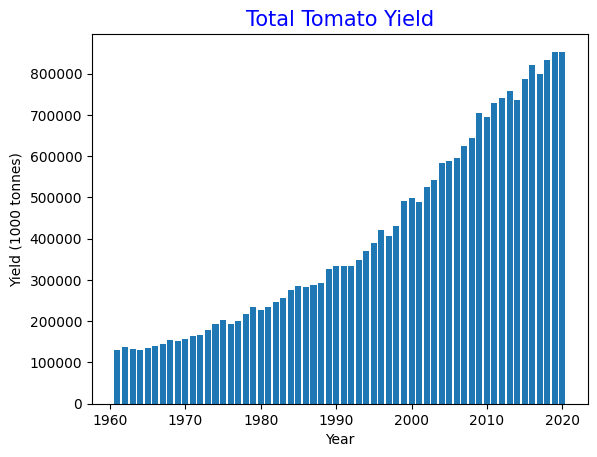

In [ ]:
plt.bar(EDAdata2['Year'],EDAdata2['Total Tomato Yield'])
plt.title(label = "Total Tomato Yield", fontsize = 15, color = "blue" )
plt.xlabel('Year')
plt.ylabel('Yield (1000 tonnes)')

With this bar chart we can see an overall incline in the Total tomato yield over the years

#Question 4

## Obtain the Data and relevant checks

In this section we import our data and obtain it. This step is crucial as without it we have no data to investigate. As you will see in the code and markup, we get the file, inspect it and change the column that should be a DateTime variable to a DateTime variable.

In [ ]:
# We use files.upload to upload the data
TimeSeriesData = files.upload()

Saving Google Trend Data Cleaned.csv to Google Trend Data Cleaned.csv


In [ ]:
# We then assign the file to a dataframe (df)
df = pd.read_csv("Google Trend Data Cleaned.csv")

In [ ]:
# We use the .head() function to make sure the data was imported correctly
df.head()

,Month,TomatoesSouthAfrica
0,1/1/2004,51
1,2/1/2004,44
2,3/1/2004,55
3,4/1/2004,49
4,5/1/2004,34


In [ ]:
# we using the .info() function to see if the datetime column is in the form of an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                238 non-null    object
 1   TomatoesSouthAfrica  238 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
# The datetime is in the form of an object hence we transform it into a datetime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
# Confirm object was changed to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month                238 non-null    datetime64[ns]
 1   TomatoesSouthAfrica  238 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


## Stationarity Tests

This section is to see whether there is Stationarity in our data. As you will see in the markup and code we firstly plot the data in order to see the trend (We identified an upwards trend), we then normalized the data and conducted a Dickey-Fuller test to see if there is stationarity. We confirmed through this test that there isnt stationarity, hence needing further work to be done to get the data Stationary. Please find after the code, the interpretation and anlyses.

In [ ]:
# We firstly define a function named "plot_df" in order to be used an called upon in other cells
def plot_df(df, x, y, title = "", xlabel='Date (In Months)', ylabel = 'Amounts', dpi = 100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

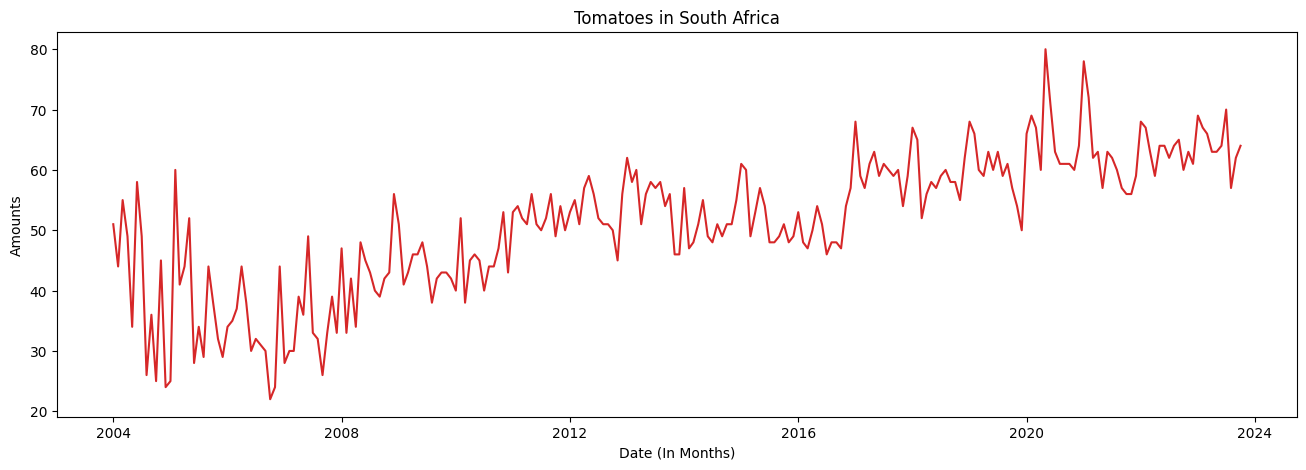

In [ ]:
# We call the function "plot_df" and plot the Month column on the x axis and the column with the tomato information on the y axis
plot_df(df, x=df.Month, y=df.TomatoesSouthAfrica, title = 'Tomatoes in South Africa')

In [ ]:
# We assign the values in the Month column to "x" and we assign the values of the tomato column to "y1"
x = df['Month'].values
y1 = df['TomatoesSouthAfrica'].values

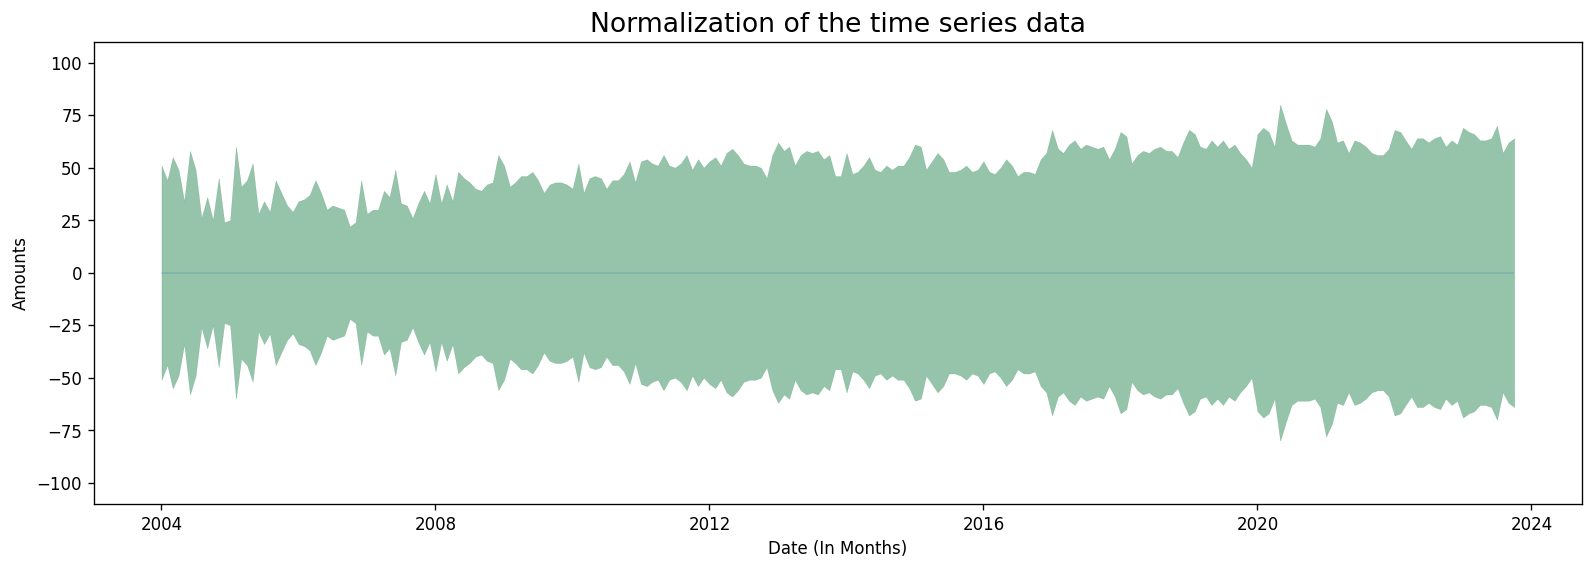

In [ ]:
# The following is used to normalize the data we have, we look at the values over the positive and negative sides, we fill the gaps between and we draw a
# horizontal line across the graph.
fig, ax = plt.subplots(1,1, figsize=(16,5), dpi = 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=0.2, color='seagreen')
plt.ylim(-110,110)
plt.title('Normalization of the time series data', fontsize = 16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth = 0.2)
plt.gca().set(xlabel='Date (In Months)', ylabel='Amounts')
plt.show()

In [ ]:
# Here we conduct the Dickey-Fuller test (adfuller in the code), to test for stationarity in the dataset. We print the Test Statistic, p value and all the
# critical values in the dataset.
result = adfuller(df.TomatoesSouthAfrica.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
  print('Critical Values:')
  print(f' {key}, {value}')

ADF Statistic: -0.8541778340375921
p-value: 0.8026877336042912
Critical Values:
 1%, -3.4594900381360034
Critical Values:
 5%, -2.8743581895178485
Critical Values:
 10%, -2.573601605503697


### Interpretation and Analyses for the "Stationarity" section

To determine whether there is stationarity in the data we had to go through a few processes and ultimately use the Dickey-Fuller test to come to a conclusion. Firstly, we plotted our Time Series data to see whether there was a trend, in which case we saw that the data was on an upwards trend. This fact alone indicates non-stationary data as the upward trend indicates the data deviates from the mean. We then went on and normalized the data, putting in a horizontal line and filling the gaps between the lines in the graph, hence looking at the residual values. Finally, we conducted a Dickey-Fuller test to determine and confirm that the data is indeed non-stationary. The Dickey-Fuller test states that if the p value is greater than the alpha value and the test statistic is greater than the Critical Values then the data is non-stationary. When looking at the outcome of the test we see the p value of 0.8537231906322168 is greater than the alpha value of 0.5 (The alpha we used in the test), hence the first criterion indicates that it is non-stationary. For the second criterion we see that the test statistic of -0.6725859710373706 is greater than the Critical Value at 1% ( -3.459884913337196), the Critical Value at 5% (-2.8745310704320794) and the Critical Value at 10% (-2.573693840082908) hence indicating that the data is non-stationary. As the Dickey-Fuller test indicates the data is non-stationary we can conclude that it is true.

## Get the d, p and q values

This section is only focused on how to get the data stationary, hence getting the p,d and q values required for the ARIMA model. We first plotted the original time series with the 1st order differencing and second order differencing to determine what value of d we should use, we decided to use the value of 2. We then plotted the Partial Autocorrelation to get the p value, we determined this to be the value of 3. We then plotted the autocorrrelation to get the q value, we determine that the most optimal q value would be 17. Please find the interpretation and analyses of this after the code.

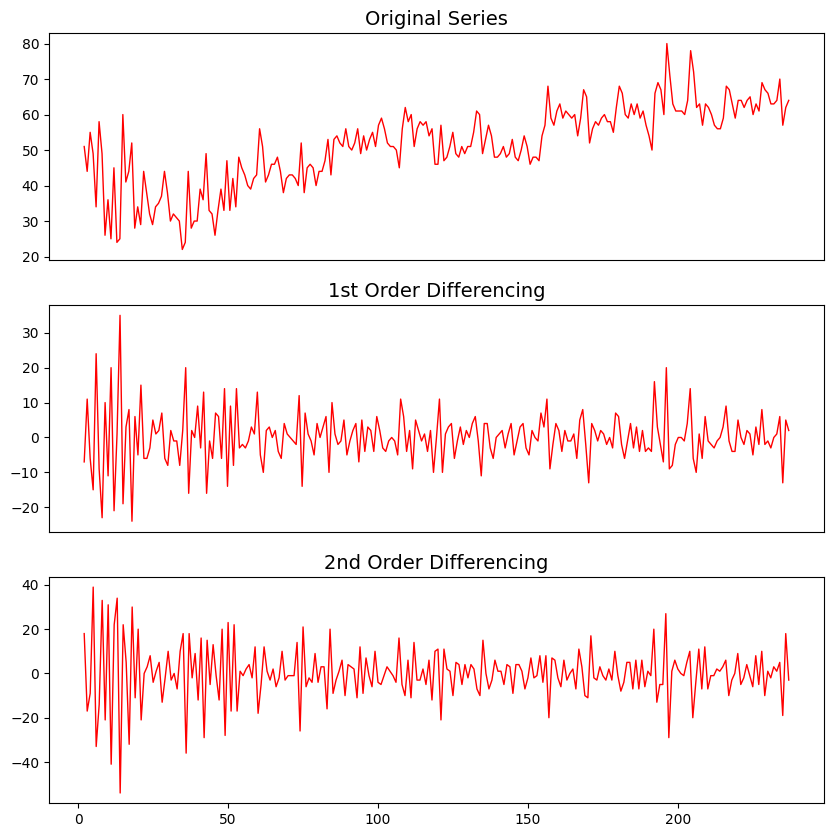

In [ ]:
#First thing we want to do is plot the original time series data as well as the first order differencing and second order differencing to determine the d value

# We plot subplots, hence creating 3 areas in which to plot the 3 graphs needed for this. We also adjusted the figures size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10, 10))

# We first plot the original time series data on the subplot "ax1". We also adjusted the graphs color, titles fontsize.
ax1.plot(df.TomatoesSouthAfrica, color = 'red', linewidth = 1); ax1.set_title('Original Series', fontsize = 14); ax1.axes.xaxis.set_visible(False)

# We plot the first order differencing on the subplot "ax2". We use the .diff() function to get the 1st order differencing. We also adjusted the graphs color, titles fontsize.
ax2.plot(df.TomatoesSouthAfrica.diff(), color = 'red', linewidth = 1); ax2.set_title('1st Order Differencing', fontsize = 14); ax2.axes.xaxis.set_visible(False)

# We plot the second order differencing on the subplot "ax3". We use 2 .diff() functions in order to difference twice hence getting our 2nd order differencing
# We also adjusted the graphs color, titles fontsize.
ax3.plot(df.TomatoesSouthAfrica.diff().diff(), color = 'red', linewidth = 1); ax3.set_title('2nd Order Differencing', fontsize = 14)
plt.show()

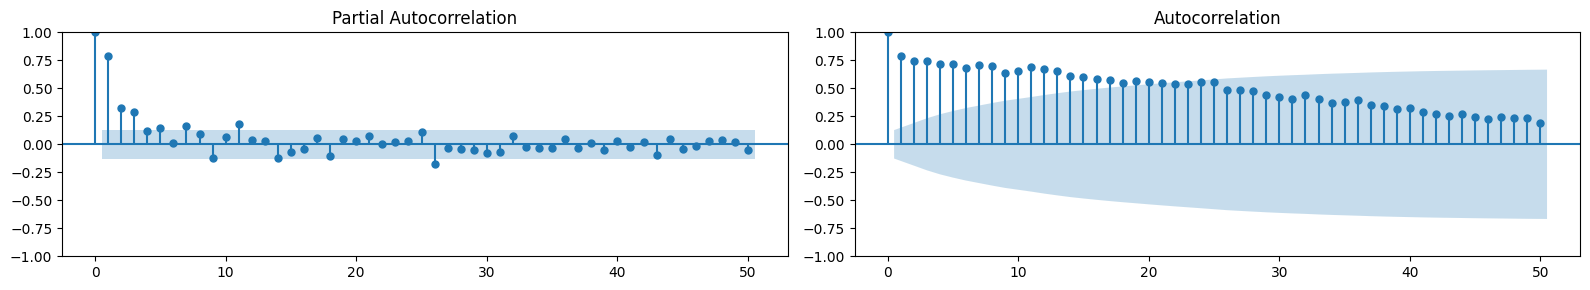

In [ ]:
# We create 2 subplots in order to plot the graphs needed. We then plot a Partial Autocorrelation graph for the p value using the plot_pacf() function and
# then we plot an Autocorrelation graph on the second subplot to get the q value, we do this by using the function plot_acf().
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi = 100)
plot_pacf(df.TomatoesSouthAfrica.tolist(), lags=50, ax=axes[0])
plot_acf(df.TomatoesSouthAfrica.tolist(), lags=50, ax=axes[1])
plt.tight_layout()

### Interpretation and Analyses of the d, p and q values

As we have concluded the data is non-stationary we need to move on the next steps, which include determining the value of the parameters of the ARIMA model, these parameters are d, p and q values. In order to do this, we needed to construct graphs with differencing, autocorrelation and Partial Autocorrelation.

The first step was to determine the value of d, which meant constructing graphs with differencing to determine the optimal value for d. In the code we firstly constructed the original data’s graph, and then constructed graphs for the first order differencing and second order differencing. As we see in the original time series set, we have an upwards trend in the data, as we start to use differencing we get rid of this trend in the data. In the first order differencing graph we see that the minimum point on the graph is -25 and maximum point is moving towards positive 50. With the second order differencing we see that the minimum point is around -50 and the maximum point is around 25. Hence when looking at the maximum and minimum points, the range we are looking at is very much of the same. One major difference is that in the first order differencing, it starts with a negative value while in the second order differencing it starts with a positive. Taking all this into consideration we conclude that a d value of 2 is adequate and best for the ARIMA model as it miimizes the noise.

After determining the d value, we then plotted graphs for the autocorrelation and partial autocorrelation to determine the values of p and q. Firstly, to determine the value of p we looked at the Partial Autocorrelation graphs. As we see in the graph, we have 7 lags that are outside of our limit or Confidence Interval, we can even go as far to say that there are 8. According to Ravi Kumar from “DevGenius”, in order to determine the p value, we ignore the 0th lag and find or identify the first lag that is very close or inside the Confidence Interval, in this case it is the 4th lag (Not including the 0th lag). We then take this, and the p value will be n-1. Hence we decided that the value of 3 would be appropriate for the p value.

Secondly to determine the q value we look at the autocorrelation graph, we will be using the same approach again for the q value as we did for the p value. We see that the 18th lag (Excluding the 0th lag), is very close to being inside the Confidence Interval hence we will use this lag to determine the q value. To get the q value we then take this value and subtract 1, hence our q value for the analysis will be 17.

Hence we will use the d value of 2, the p value of 3 and the q value of 17 for the ARIMA model and believe these are adequate for the models’ parameters.

Please find the reference for identifying the q and p values under the heading "References" if needed

## ARIMA Model

In this section we firstly fitted our model hence training the model to predict. We then got the summary for the Model to see how it performed. Its a good indication that the AIC is less then the BIC but the values are large, we would want them below 200, hence the predictions will not be incredibly accurate and hence have a large confidence interval. We then plot the original data with the predicted data on the same graph, we see that the model learns pretty well over time but does not predict the up and down movements perfectly, but does get the trend right and the general strucutre. We then plotted our original data with the predicted data for the next 24 months on a graph, with the confidence interval also included. Please find a short analysis below the code.

In [ ]:
# We first use the ARIMA() function to get the data stationary, we do this by including within the parameters, the order which includes the p, d and q values
# determined in the previous section. This cell makes the original data stationary hence being able to use it.
model = ARIMA(df.TomatoesSouthAfrica, order = (3,2,17))

In [ ]:
# We then use the .fit() to obtain a trained model (Trained using the model).
ModelFit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# We print the Models summary to see how the model did. We use the "No. Observations" to make sure it used all the data, and use the AIC and BIC to see if the
# model is well trained. There is a lot of different interpretation that can be conducted using the .summary() function
print(ModelFit.summary())

                                SARIMAX Results                                
Dep. Variable:     TomatoesSouthAfrica   No. Observations:                  238
Model:                 ARIMA(3, 2, 17)   Log Likelihood                -752.315
Date:                 Sat, 11 Nov 2023   AIC                           1546.629
Time:                         22:01:33   BIC                           1619.370
Sample:                              0   HQIC                          1575.952
                                 - 238                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4292      0.105    -13.553      0.000      -1.636      -1.223
ar.L2         -1.2810      0.119    -10.799      0.000      -1.513      -1.049
ar.L3         -0.8126      0.107     -7.562 

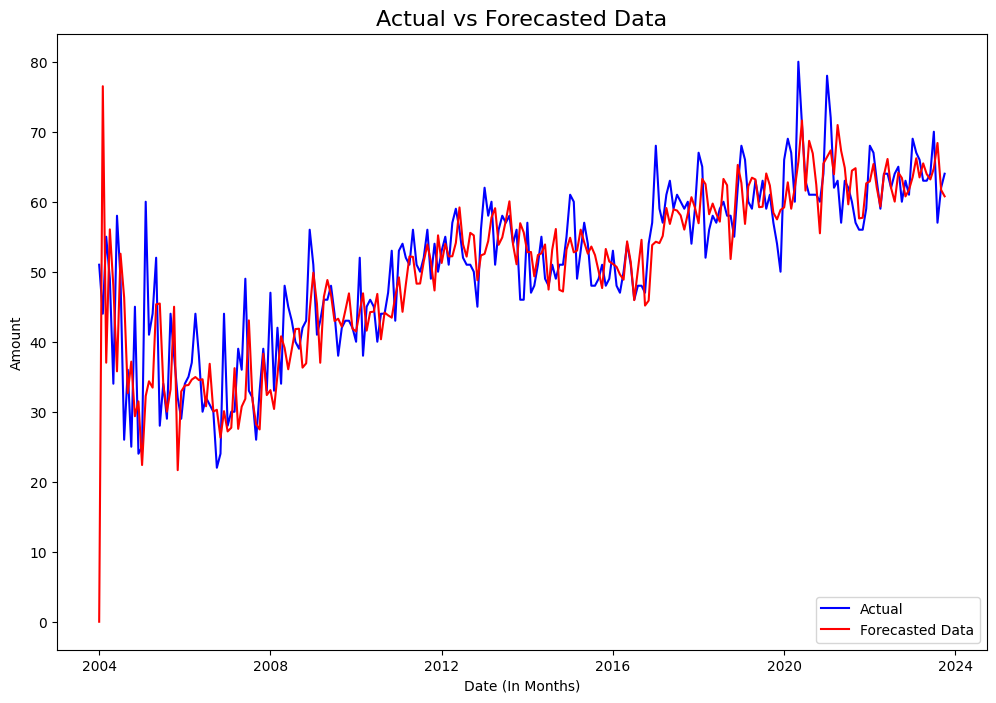

In [ ]:
# This cell is used to plot the original data or time series with the trained model

# We use the .predict() to predict the values using the trained model. We then assign this to a "forecast" column or variable in the dataframe "df"
df['forecast'] = ModelFit.predict()
df[['TomatoesSouthAfrica','forecast']]

# We create a figure and plot the original time series data on the figure and make it blue as well as plot the predicted data on the same figure and make
# it red, we use the df['Month] in order to have the Months on the bottom of the figure and plot it with the Amount on the axis.
plt.figure(figsize=(12, 8))
plt.plot(df['Month'], df['TomatoesSouthAfrica'], label='Actual', color = 'blue')
plt.plot(df['Month'], df['forecast'], label='Forecasted Data', color='red')
plt.ylabel('Amount')
plt.xlabel('Date (In Months)')
plt.title('Actual vs Forecasted Data', fontsize=16)
plt.legend()
plt.show()

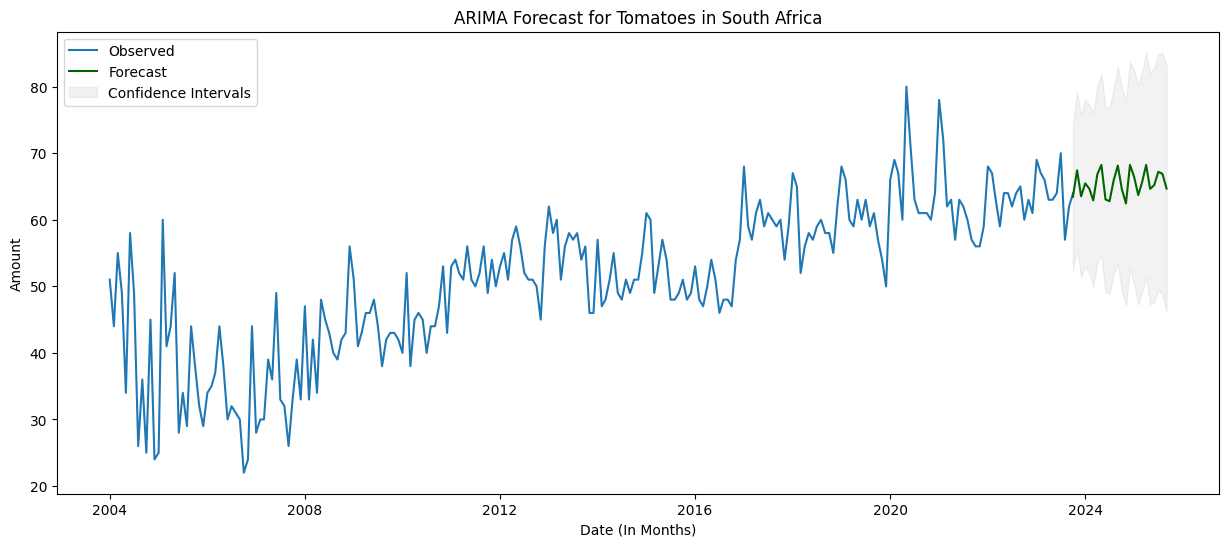

In [ ]:
# Creating a start and end position in order to forecast the number of months we want to forecast. The start is the maximum value of our Months column, hence we
# start at the end of our original data. We use dateoffset in order to align the prediction with the actual data
start = df['Month'].max() - pd.DateOffset(months = 1)
end = 24

# We then get the ofrecasted data by using the .get_forecast() function. This forecasts our data up till the "end" as stated above. Hence we getting 24 months
# forecasting
forecast = ModelFit.get_forecast(steps=end)

# We then get the forecasted mean and the forecasted confidence intervals by using the .predict_mean and the .conf_int()
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# We plot a figure and set the appropriate size
plt.figure(figsize=(15, 6))

# We plot the months on the x axis and the amounts on the y axis
plt.plot(df['Month'], df['TomatoesSouthAfrica'], label='Observed')

# We then create an index for out forecast, where it begins with the start date and ends with the ending value as determined above.
forecast_index = pd.date_range(start, periods=end, freq='M')

# We plot the forecasted mean in darkgreen and for the time specified in the index.
plt.plot(forecast_index, forecast_mean, color='darkgreen', label='Forecast')

# We plot the confidence interval for the time frame and fill between it with the color 'k', we also set the alpha to 0.05. We are selecting both the maximmum
# positives and negatives of the Confidence Intervals by using the .iloc methods.
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.05, label='Confidence Intervals')

# We set the titles and x and y labels as needed. We loc the legend to the top left of the graph so that it doesnt overlap with the graph.
plt.title('ARIMA Forecast for Tomatoes in South Africa')
plt.xlabel('Date (In Months)')
plt.ylabel('Amount')
plt.legend(loc = 'upper left', fontsize = 10)
plt.show()

### Interpretation and Analyses of the ARIMA Model

For the visualisation of the ARIMA model, we first used the “.predit()” function to get the model to predict values based on the underlying dataset. We went and plotted these predictions over the original dataset to see how it compares to the actual results. We see that the model learns as it goes, and the predictions become more accurate over time and follow the same trend. It is important to note that it does not follow the exact same pattern and the predictions are slightly out, this is elaborated on further below but falls down to the AIC and BIC values.

We then proceeded to predict the next 24 months of results by using the “get_forecast()” function. This allowed us to make forecasts of future values, we plotted this on the graph with the actual data as well as plotted the Confidence Interval to see the variation we are looking at with the prediction. The AIC is smaller then the BIC which is a good indication, but they are high, we would usually look for these values to be below 200, hence the prediction is not going to be entirely accurate.

**What We get out of all this**

We need to firstly understand what the underlying data means prior to being able to interpret. Google Trends data specifically has to do with the searches that are being made by people on a certain topic. A value of 100 on Google Trends means that the term is in peak popularity while a value of 50 would mean that the term is only at half popularity, if the value is 0 it means that there isnt data available for that specific time period. When looking at our specific data, it is in essence measuring the consumer behaviour regarding the term "Tomatoes" in South Africa specifically.

Now that we understand the underlying data we are able to predict this consumer behaviour over the next 24 months. When looking at the predictions made we see that it is on a very slight upward trend over the next 24 months, hence according to the models prediction we can expect the consumer behaviour to stay relatively the same over the next 24 months with perhaps a slight increase due to the very slight upward trend. What is important to note is the confidence interval is very large, the reason for this is down to the AIC and BIC values as they are very large, if they were closer to ideal (Below 200), this confidence interval would be much smaller. Due to there being a large confidence interval it means that the predictions can deviate anywhere in between the upper and lower bounds of the interval. As the interval is very large this indicates we can expect there to possibly be quite a bit of deviation from the actual forecast.

## ARIMA Model Residuals

In this section we performed a diagnostic test to take a deeper look into the residuals of the data. In the first graph we concluded that there is no pattern hence this is a good sign that the model performed well. Then in the second and third graph, we see that the distribution is very close to normal distribution and the majority of the residuals fall on the line in the 3rd graph with only a few deviations. Finally in the last graph we see that all the lags fall in the confidence interval (Excluding the first lag), indicating that the model performed well. From all of this we can conclude that the model's working correctly. Please find below the code a greater in depth interpretation of the residuals.

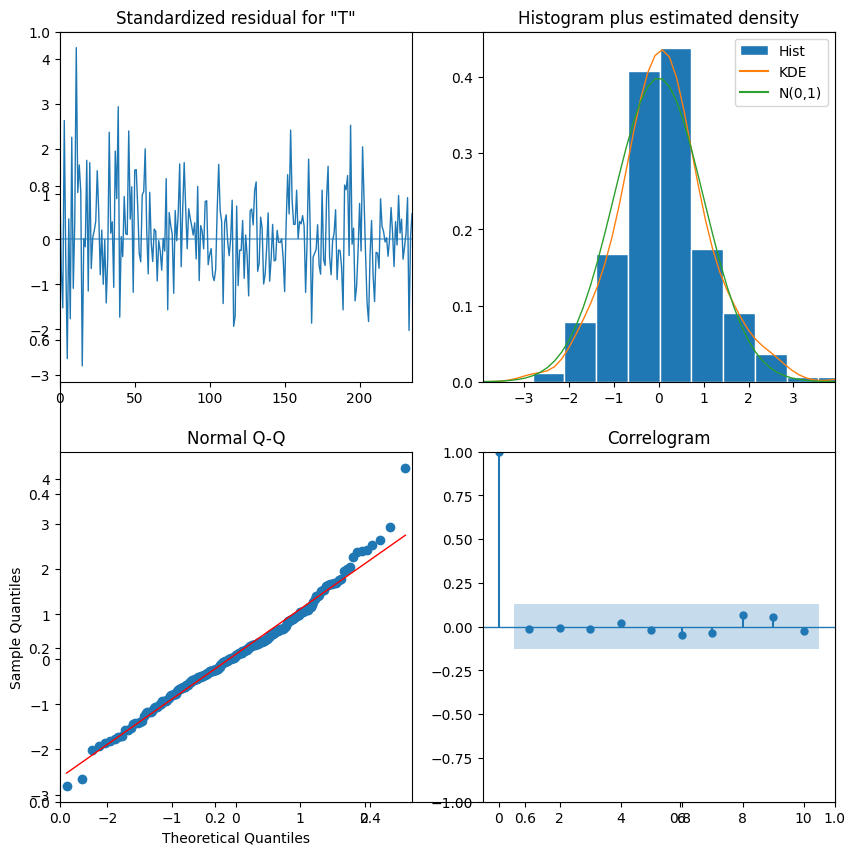

In [ ]:
# Plot diagnostics
fig, axes = plt.subplots(figsize=(10, 10))
diagnostics = ModelFit.plot_diagnostics(fig=fig)

# Once Generated we use a for loop to loop through each graph and change the line width to 1
for ax in diagnostics.axes:
    for line in ax.lines:
        line.set_linewidth(1)

# Show the plot
plt.show()

### Interpretation and Analyses of the Residuals

When looking at the “plot_diagnostics” function we are able to analyse the residual values in our model to determine how well the model is performing and to see whether it is indeed a good model for the data.

In the first graph, “Standardised Residuals for T” (Top Left), the graph is showing us the “one-step ahead” standardised residuals. We can see in this graph there is no pattern at all that can be seen or predicted, this is a good thing and indicates to us that the model is working correctly. The second graph, “histogram plus estimated density” (top right), is in essence showing us the distribution of our residual values. The orange line in the graph is our “kde” which is in essence our smoothed histogram, while the green line shows us the normal distribution. The most ideal point is where the “kde” line and the normal distribution line is identical as it would indicate that our data is normally distributed. In this case it is very similar, with a few differences, but the shape is very much the same. For this reason, it indicates to us that our model is working correctly. The next graph, “Normal Q – Q” (bottom left), compares the distribution of the residuals to the normal distribution, hence going hand in hand with the Histogram. If the distribution of the residuals is normal then all the residual points would be on the line. As we already know, we do not have perfectly normal distribution (Histogram), hence we already know that all the residuals will not be on the line. We see that only a few are severely off the line and the majority are on or incredibly close to being on the line, indicating to us that the model is working correctly. The last plot, “Correlogram” (bottom left), is the exact same concept as the Autocorrelation Graph conducted earlier, except the Correlogram now plots the residuals instead of the data. We see that all the lags are in the confidence interval (Excluding the first) and are nearly all on the line as well. This is a very good indication and indicates to us that the model is working correctly, and indicates to us that all the information in the data was indeed captured by the model.

With all the above infromation in mind we can conclude that the model is working well.

# References

Please find all the references used for the interpretation and coding below

**Question 3 - EDA**

https://builtin.com/data-science/EDA-python

https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

https://link.springer.com/article/10.1007/s11433-010-4166-z#:~:text=A%20higher%20correlation%20tends%20to,the%20prediction%20of%20solar%20activity.

https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/

**Question 4 - ARIMA **

https://towardsai.net/p/l/time-series-forecasting-with-arima-models-in-python-part-2

https://blog.devgenius.io/finding-optimal-p-d-and-q-values-for-your-arima-model-94669a909a35

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/#:~:text=If%20the%20time%20series%20is,(ACF)%20of%20the%20data.

https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

https://sites.google.com/site/econometricsacademy/econometrics-models/time-series-arima-models

https://matplotlib.org/3.1.1/api/colors_api.html
